<a href="https://colab.research.google.com/github/gabgesp/linlogreg/blob/main/regresion_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

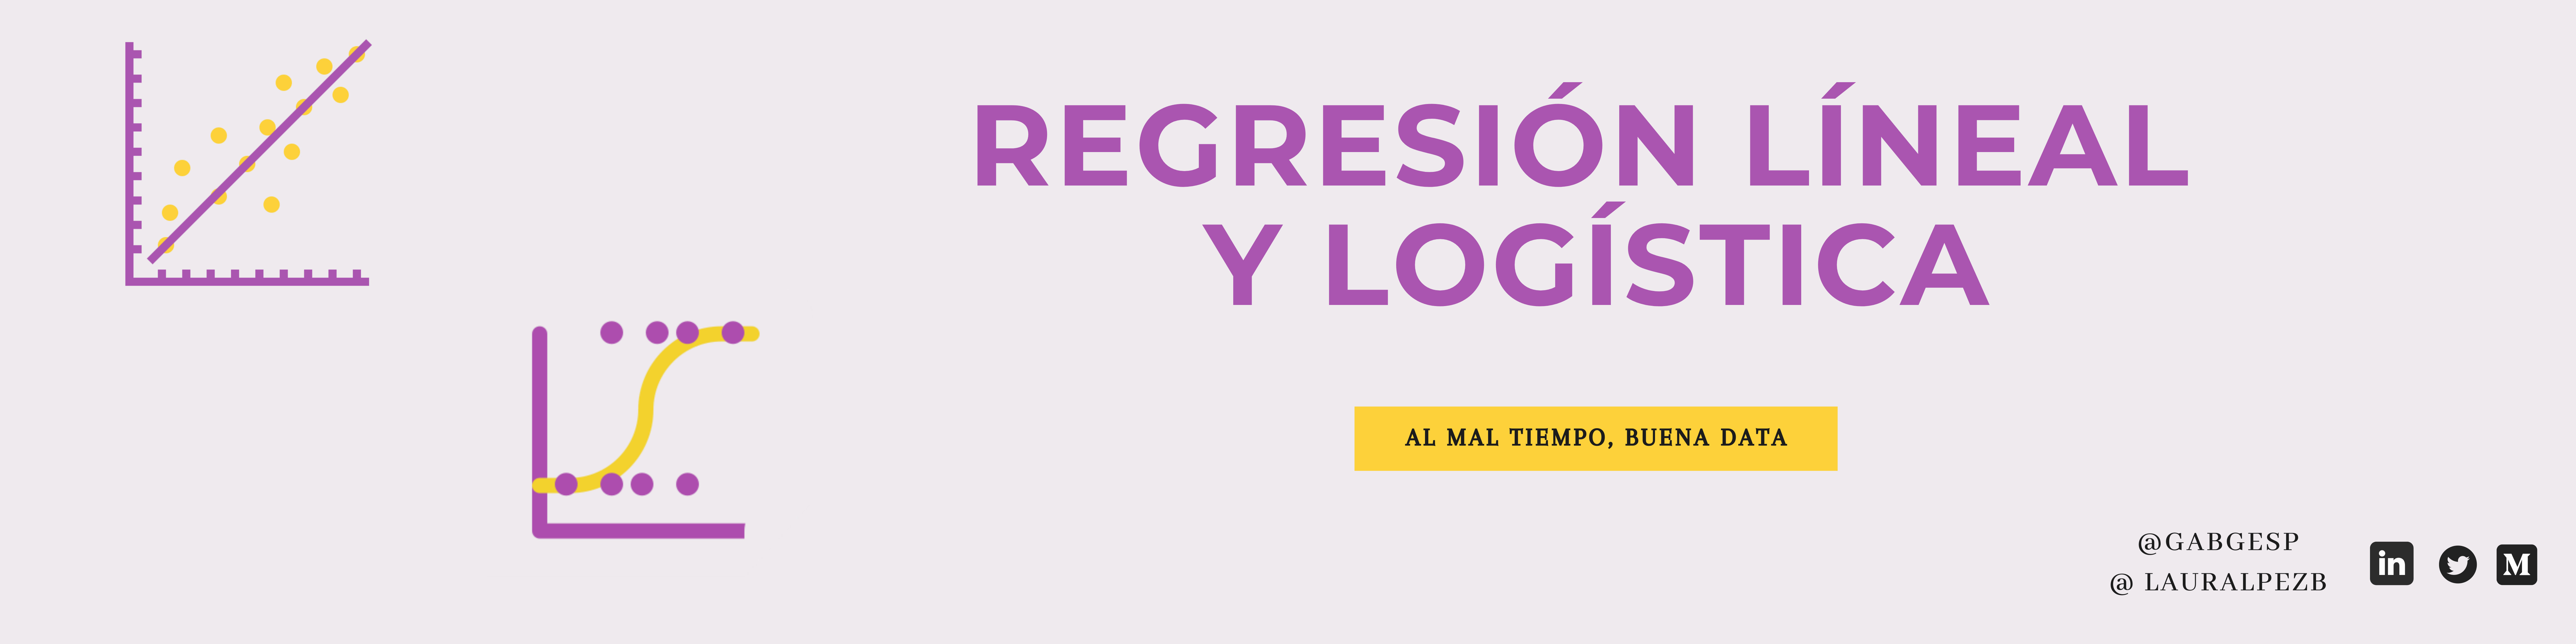

In [ ]:
from IPython.display import Image
Image(filename='Banners.png')

# Importar librerias

In [ ]:
#Importación de librerías 
#Procesamiento
import numpy as np
import pandas as pd

#Librerías de Scikit Learn para el desarrollo de los modelos de regresion lineal y logística 
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Librerías para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Regresión Líneal

In [ ]:
#Importar dataset
diabetes = datasets.load_diabetes()

print('Número total de filas para X ', len(diabetes.data), 'y para Y ', len(diabetes.target))

Número total de filas para X  442 y para Y  442


In [ ]:
# División del conjunto de datos en entrenamiento y prueba (Manual)
diabetes_x_train = diabetes.data[:-50]           # Muestra de entrenamiento, sin incluir los últimos 50 registros
diabetes_x_test = diabetes.data[-50:]            # Muestra de prueba con 50 datos
diabetes_y_train = diabetes.target[:-50]           # Muestra de entrenamiento de la variable objetivo 
diabetes_y_test = diabetes.target[-50:]            #  Muestra de prueba de la variable objetivo 

In [ ]:
# Entrenamiento de la regresión lineal
mlr = linear_model.LinearRegression()
mlr.fit(diabetes_x_train, diabetes_y_train)  # Entrenar el modelo

diabetes_y_pred = mlr.predict(diabetes_x_test) # Predicción

In [ ]:
# Evaluar el modelo
print("R2 Score: ", r2_score(diabetes_y_test, mlr.predict(diabetes_x_test))) # Entre más cercano a 1 mejor es el modelo, pero cuidado con el sobreajuste

#Para crear la ecuación podemos obtener los coeficientes de las variables X y el intercepto
print('Coeficientes:', mlr.coef_)
print('Intercepto:', mlr.intercept_)

Coeficientes: [   1.19680495 -233.50366519  519.88450429  304.48097981 -726.44619916
  415.80697199   83.01061117  203.1648289   667.92936385  105.27983988]
Intercepto: 152.2312643406476
R2 Score:  0.6973123330197109


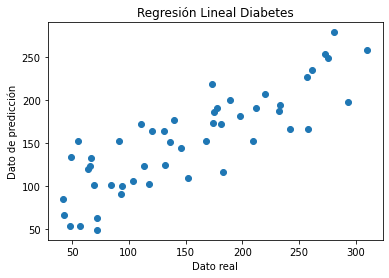

In [ ]:
# Gráfica
plt.title('Regresión Lineal Diabetes')   
plt.xlabel('Dato real')                 # coordenadas del eje x
plt.ylabel('Dato de predicción')         # coordenadas del eje y
plt.scatter(diabetes_y_test, diabetes_y_pred) # Debe tener forma líneal, lo que indica que la predicción se aproxima a los datos reales
plt.show()

# Regresión Logística

In [ ]:
#Leer datos a partir del archvo csv
pima = pd.read_csv("diabetes.csv")

pima.head() # Devuelve los primeros 5 elementos de la estructura

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# División del conjunto de datos en entrenamiento y prueba (Usando train_test_split)
X = pima.iloc[:,:-1]
y = pima.Outcome # Variable objetivo

# Dividir en entrenamiento y prueba, donde el 20% de los datos son de prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
# Crear el modelo
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(X_train,y_train)

# Realizar predicción
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Visualizar la matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

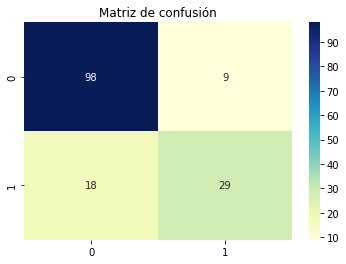

In [ ]:
# Graficar matriz de confusión
class_names=[0,1] # Categorias a predecir

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Matriz de confusión', y=1.1);

In [ ]:
# Métricas de evaluación
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


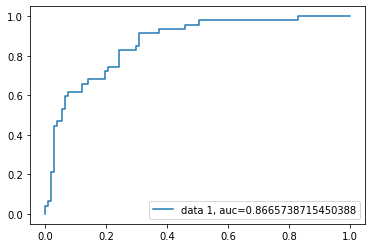

In [ ]:
# Área bajo la curva se conoce como AUC. A mayor AUC, mejor el modelo
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()